In [16]:
import pandas as pd
import plotly
from fbprophet import Prophet
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'plotly'

In [2]:
home_values = pd.read_csv('Zip_Zhvi_AllHomes.csv', encoding="ISO-8859-1")
home_values.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2018-08,2018-09,2018-10,2018-11,2018-12,2019-01,2019-02,2019-03,2019-04,2019-05
0,61639,10025,New York,NY,New York-Newark-Jersey City,New York County,1,168300.0,168400.0,168400.0,...,1085900,1079100,1072700,1067100,1052000,1028500,1012900,1005800,985400,965000
1,84654,60657,Chicago,IL,Chicago-Naperville-Elgin,Cook County,2,160000.0,161000.0,161700.0,...,347200,348500,350500,352500,352800,352600,352800,352100,350000,347600
2,61637,10023,New York,NY,New York-Newark-Jersey City,New York County,3,353100.0,353700.0,354200.0,...,1436300,1410400,1392000,1383300,1375000,1368200,1366800,1357900,1350800,1355000
3,91982,77494,Katy,TX,Houston-The Woodlands-Sugar Land,Harris County,4,210400.0,212200.0,212200.0,...,338000,338200,337000,336300,336100,335400,334100,333400,333500,333700
4,84616,60614,Chicago,IL,Chicago-Naperville-Elgin,Cook County,5,194400.0,196100.0,197300.0,...,430600,429700,429900,431400,432000,432000,431700,430100,427900,425300


In [3]:
home_values[home_values['RegionName'] == 98117]

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2018-08,2018-09,2018-10,2018-11,2018-12,2019-01,2019-02,2019-03,2019-04,2019-05
2198,99577,98117,Seattle,WA,Seattle-Tacoma-Bellevue,King County,2199,165300.0,165900.0,166500.0,...,791900,790100,788200,785900,785500,786700,785400,782100,777700,772200


In [4]:
def prophet_df_from_zillow_row(row):
    row = row.copy()
    row = row.T
    row = row.drop(['RegionID', 'RegionName', 'City', 'State', 'Metro', 'CountyName', 'SizeRank'])
    row = row.reset_index()
    row = row.rename(columns={'index': 'ds', 2198: 'y'})
    row['ds'] = pd.to_datetime(row['ds'])
    return row
    
prophet_row = prophet_df_from_zillow_row(home_values[home_values['RegionName'] == 98117])

In [6]:
m = Prophet(seasonality_mode='multiplicative')
m.fit(prophet_row)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/home/will/anaconda3/lib/python3.7/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [11]:
future = m.make_future_dataframe(periods=120, freq='M')
future.tail()

,ds
393,2028-12-31
394,2029-01-31
395,2029-02-28
396,2029-03-31
397,2029-04-30


In [12]:
forecast = m.predict(future)
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
393,2028-12-31,1.527060e+06,1.260637e+06,1.783857e+06,1.270427e+06,1.787118e+06,-1278.641736,-1278.641736,-1278.641736,-1278.641736,-1278.641736,-1278.641736,0.0,0.0,0.0,1.525782e+06
394,2029-01-31,1.533013e+06,1.271736e+06,1.799004e+06,1.272928e+06,1.796074e+06,632.258481,632.258481,632.258481,632.258481,632.258481,632.258481,0.0,0.0,0.0,1.533645e+06
395,2029-02-28,1.538390e+06,1.274302e+06,1.802656e+06,1.274638e+06,1.803927e+06,3599.804182,3599.804182,3599.804182,3599.804182,3599.804182,3599.804182,0.0,0.0,0.0,1.541990e+06
396,2029-03-31,1.544342e+06,1.264213e+06,1.805055e+06,1.276411e+06,1.812756e+06,-4473.259632,-4473.259632,-4473.259632,-4473.259632,-4473.259632,-4473.259632,0.0,0.0,0.0,1.539869e+06
397,2029-04-30,1.550103e+06,1.260636e+06,1.816381e+06,1.278145e+06,1.821581e+06,-8880.868066,-8880.868066,-8880.868066,-8880.868066,-8880.868066,-8880.868066,0.0,0.0,0.0,1.541222e+06


In [13]:
fig = plt.figure(figsize=(15,8), dpi=1000)
ax = fig.add_subplot(111)
plt.title("Seattle - 98117 Housing Cost Projections")
fig1 = m.plot(forecast, ax=ax, xlabel="Year", ylabel="Housing Cost in USD")

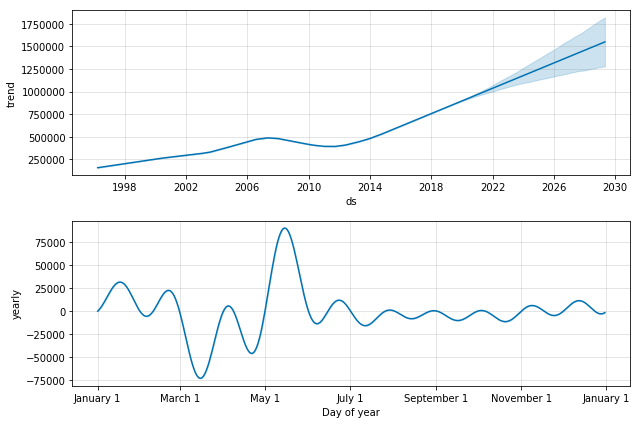

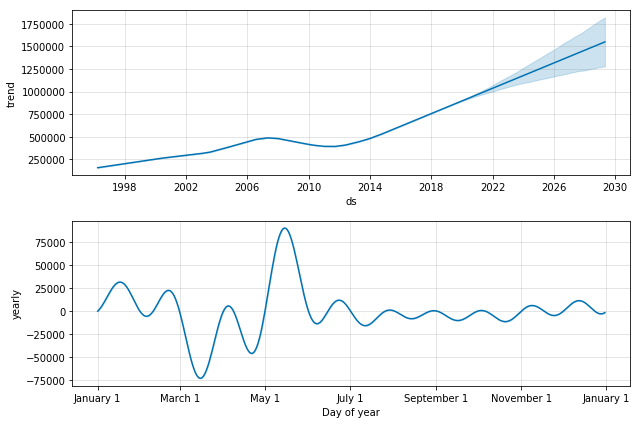

In [15]:
m.plot_components(forecast)

In [ ]:
# Prophet plot function code
def plot(
    m, fcst, ax=None, uncertainty=True, plot_cap=True, xlabel='ds', ylabel='y',
    figsize=(10, 6)
):
    if ax is None:
        fig = plt.figure(facecolor='w', figsize=figsize)
        ax = fig.add_subplot(111)
    else:
        fig = ax.get_figure()
    fcst_t = fcst['ds'].dt.to_pydatetime()
    ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.')
    ax.plot(fcst_t, fcst['yhat'], ls='-', c='#0072B2')
    if 'cap' in fcst and plot_cap:
        ax.plot(fcst_t, fcst['cap'], ls='--', c='k')
    if m.logistic_floor and 'floor' in fcst and plot_cap:
        ax.plot(fcst_t, fcst['floor'], ls='--', c='k')
    if uncertainty:
        ax.fill_between(fcst_t, fcst['yhat_lower'], fcst['yhat_upper'],
                        color='#0072B2', alpha=0.2)
    ax.grid(True, which='major', c='gray', ls='-', lw=1, alpha=0.2)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    fig.tight_layout()
    return fig